In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset=pd.read_csv("../Data/Odi_bating.csv")

In [3]:
print(dataset.head(5))

  Player Name  Mat Inns NO Runs  HS Ave  BF     SR 100 50  0 4s 6s  \
0  A Athanaze    3    3  0   60  32  20  77  77.92   0  0  0  6  1   
1  A Athanaze    1    1  0    0   0   0   1      0   0  0  1  0  0   
2  A Athanaze    1    1  0    4   4   4   2    200   0  0  0  1  0   
3     A Bagai    1    1  0   10  10  10  24  41.66   0  0  0  0  0   
4     A Bagai    1    1  0   16  16  16  35  45.71   0  0  0  2  0   

  Opposition Team  
0           India  
1        Zimbabwe  
2     West Indies  
3        Scotland  
4        Pakistan  


In [4]:
df=dataset


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Player Name        0
Mat                0
Inns               0
NO                 0
Runs               1
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
4s                 0
6s                 0
Opposition Team    0
dtype: int64


In [6]:
# Drop rows with missing values in the "Runs" column
df.dropna(subset=['Runs'], inplace=True)

In [7]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [8]:
print(df.isnull().sum())

Player Name        0
Mat                0
Inns               0
NO                 0
Runs               0
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
4s                 0
6s                 0
Opposition Team    0
dtype: int64


In [9]:
df.replace('-', 0, inplace=True)

In [10]:
print("Data Types:")
print(df.dtypes)

Data Types:
Player Name        object
Mat                 int64
Inns               object
NO                 object
Runs               object
HS                 object
Ave                object
BF                 object
SR                 object
100                object
50                 object
0                  object
4s                 object
6s                 object
Opposition Team    object
dtype: object


In [11]:
# Convert selected columns to numeric data types
numeric_columns = ['Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check data types again
print(df.dtypes)

Player Name         object
Mat                  int64
Inns                 int64
NO                   int64
Runs                 int64
HS                 float64
Ave                float64
BF                   int64
SR                 float64
100                  int64
50                   int64
0                    int64
4s                   int64
6s                   int64
Opposition Team     object
dtype: object


In [14]:
print(df.isnull().sum())

Player Name        0
Mat                0
Inns               0
NO                 0
Runs               0
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
4s                 0
6s                 0
Opposition Team    0
dtype: int64


In [13]:
# Replace the missing values with 0
df['HS'] = df['HS'].fillna(0)

In [ ]:
#EDA

In [ ]:
#visbualizing the distribution of numeric variables like 'Runs', 'Ave' (average), 'BF' (balls faced), and 'SR' (strike rate). We can create histograms for each of these variables to understand their distributions.

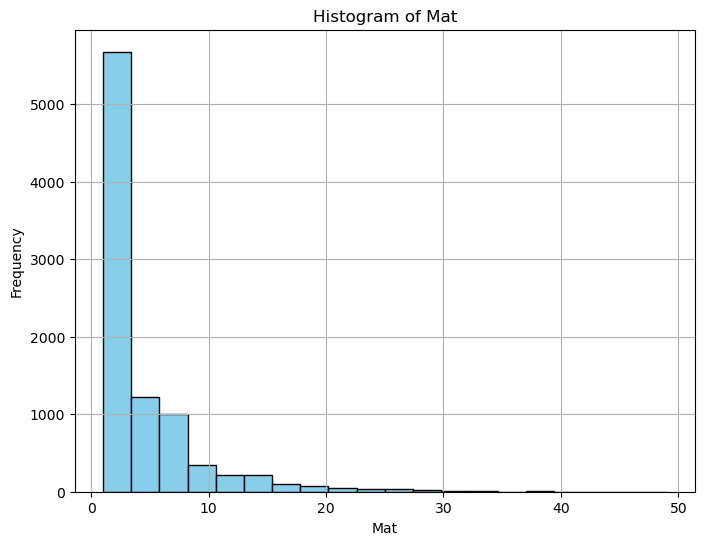

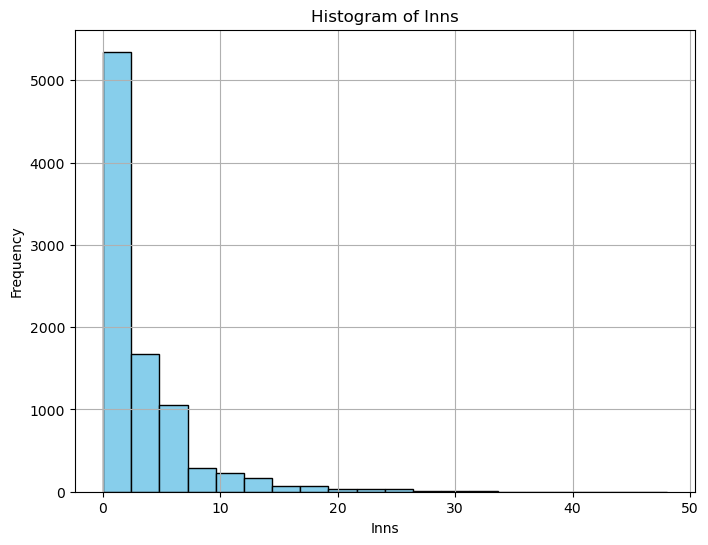

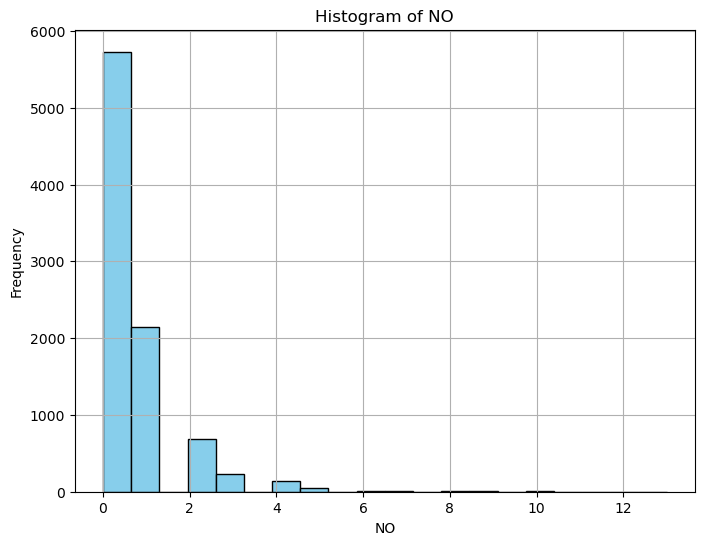

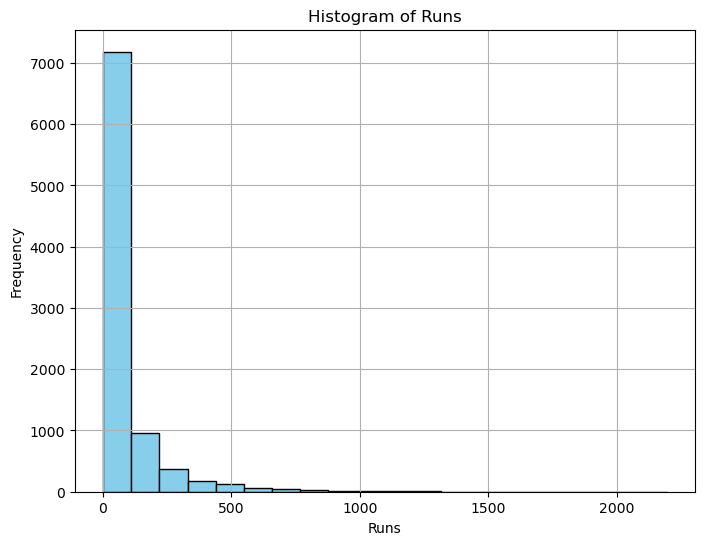

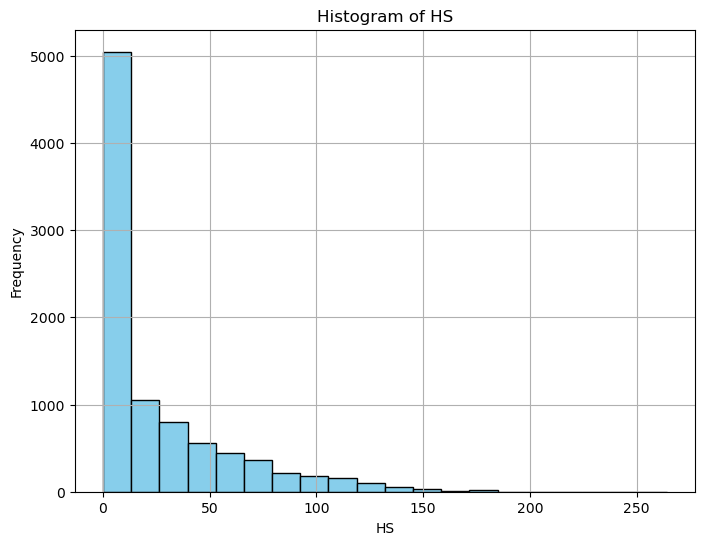

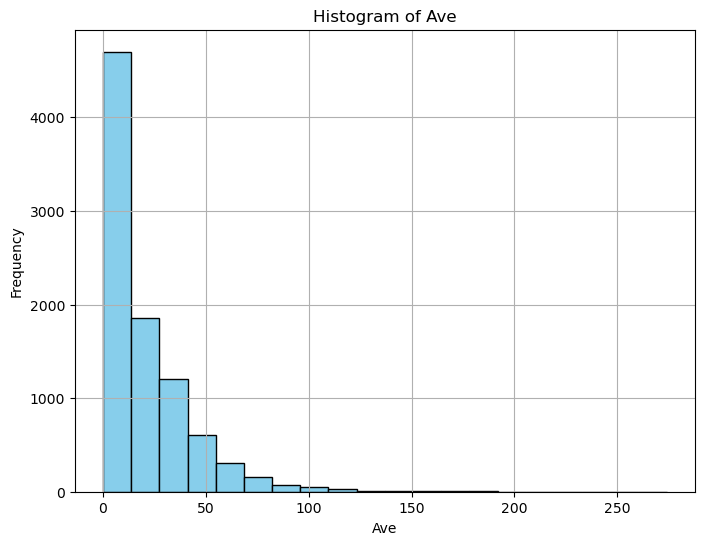

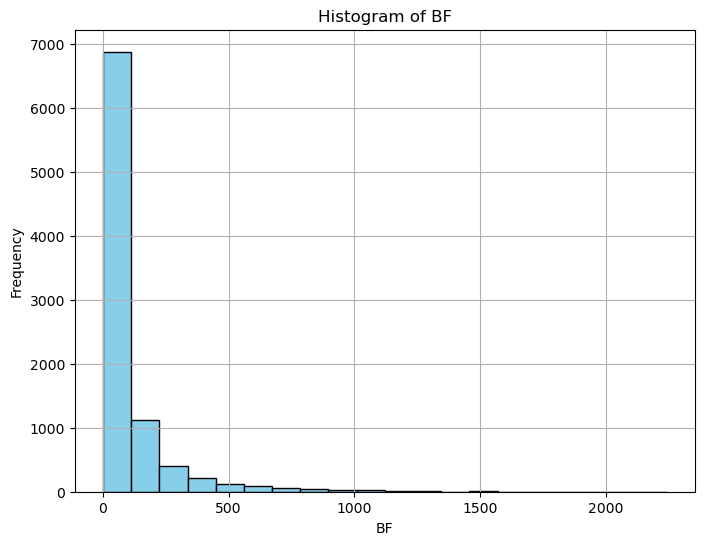

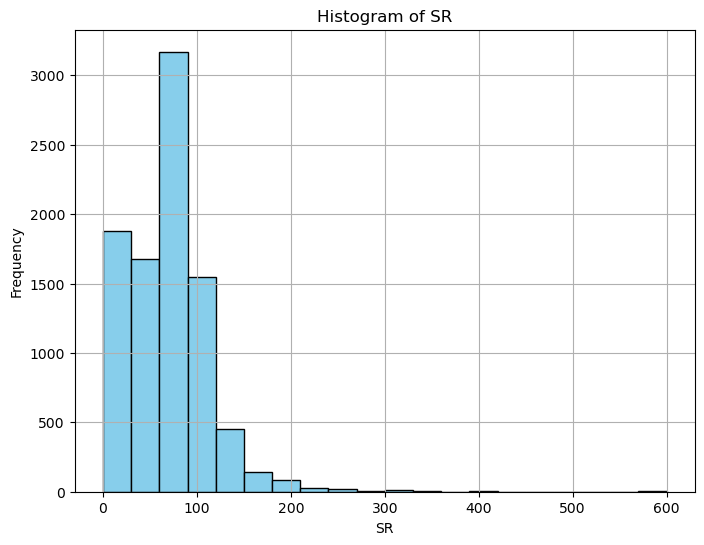

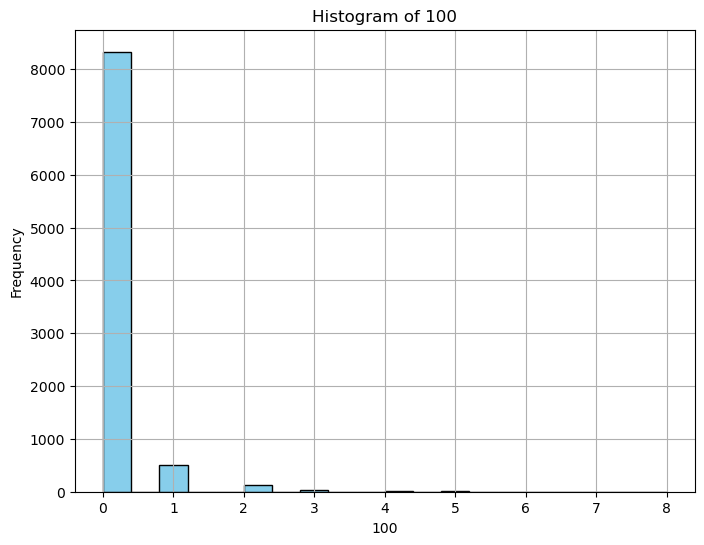

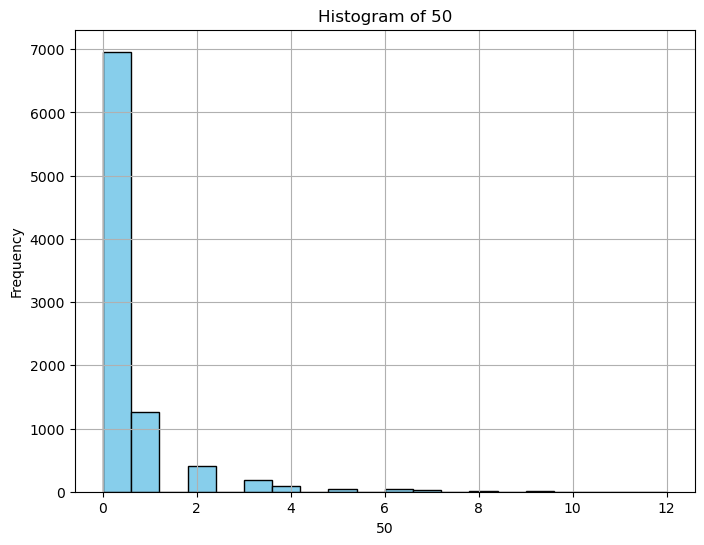

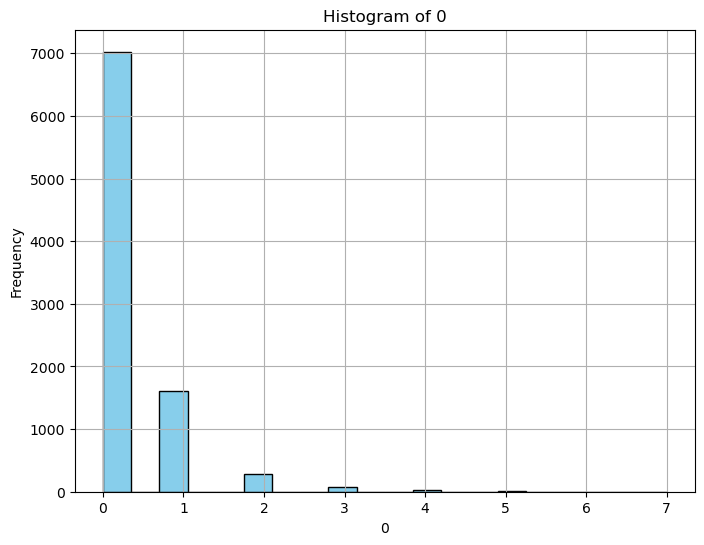

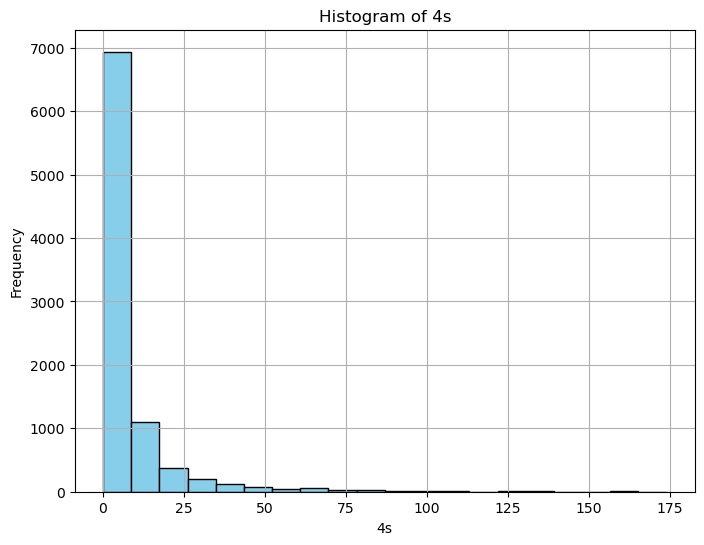

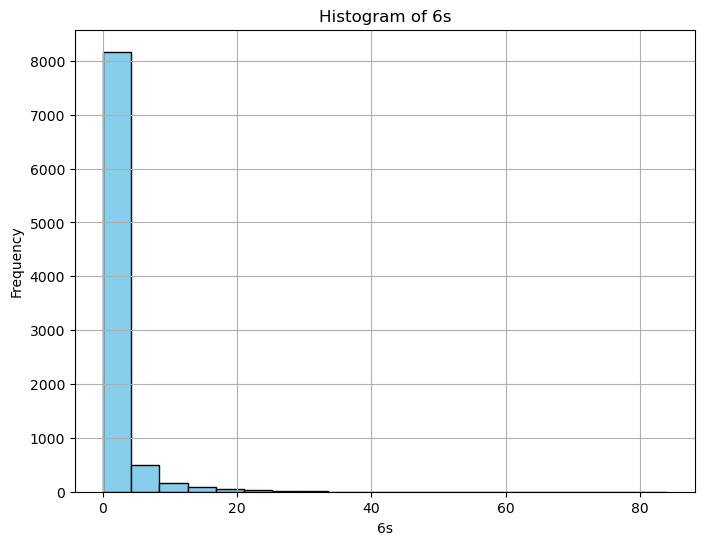

In [15]:
import matplotlib.pyplot as plt

# Selecting only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Creating histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
#Scatter plot for the relationship between "Runs" and "Strike Rate":

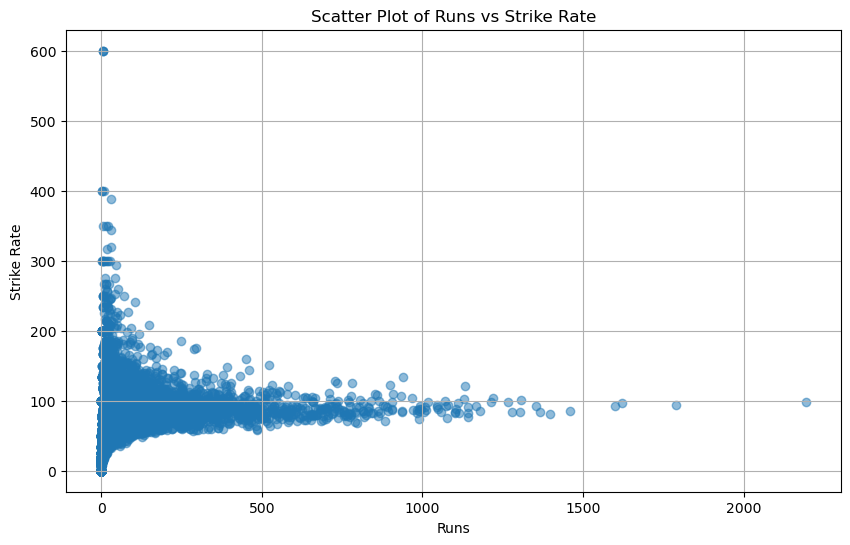

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Runs'], df['SR'], alpha=0.5)
plt.title('Scatter Plot of Runs vs Strike Rate')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


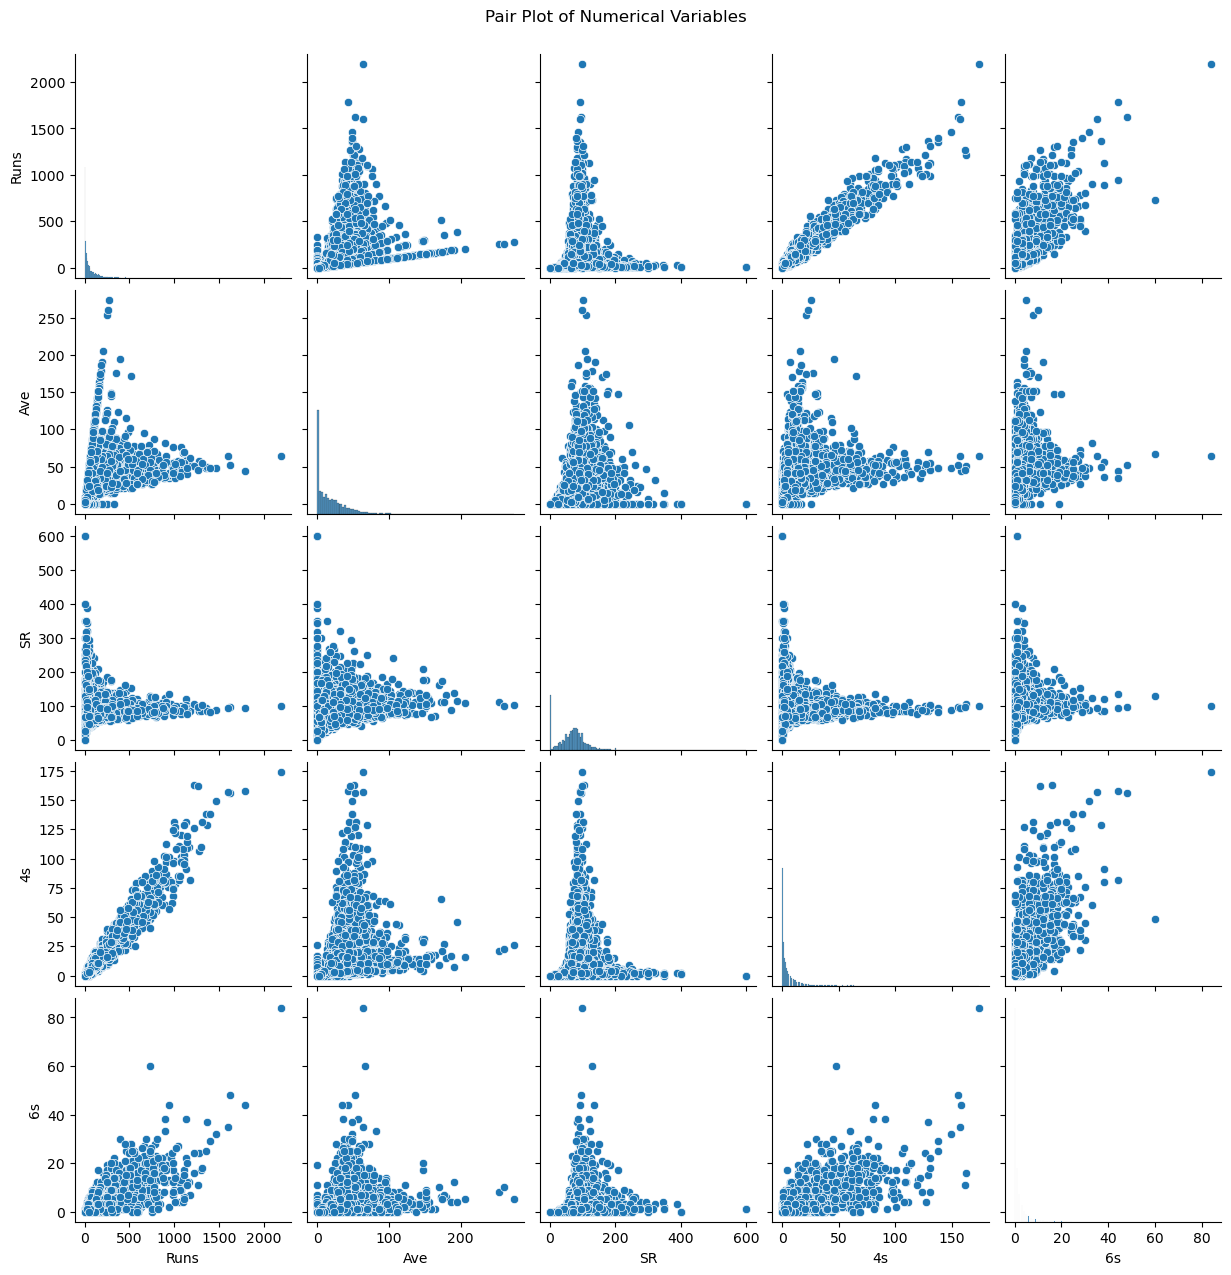

In [18]:
import seaborn as sns

# Selecting numerical variables
numerical_vars = ['Runs', 'Ave', 'SR', '4s', '6s']

# Creating pair plot
sns.pairplot(df[numerical_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


In [ ]:
#Analysis of Categorical Variables:

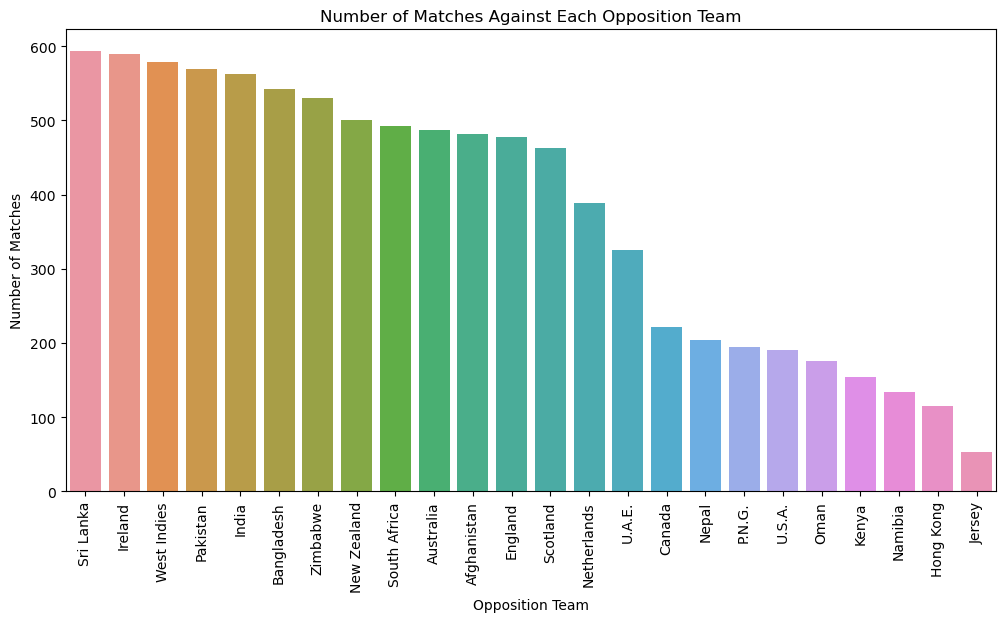

In [19]:
# Count plot for 'Opposition Team'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opposition Team', order=df['Opposition Team'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Matches Against Each Opposition Team')
plt.xlabel('Opposition Team')
plt.ylabel('Number of Matches')
plt.show()


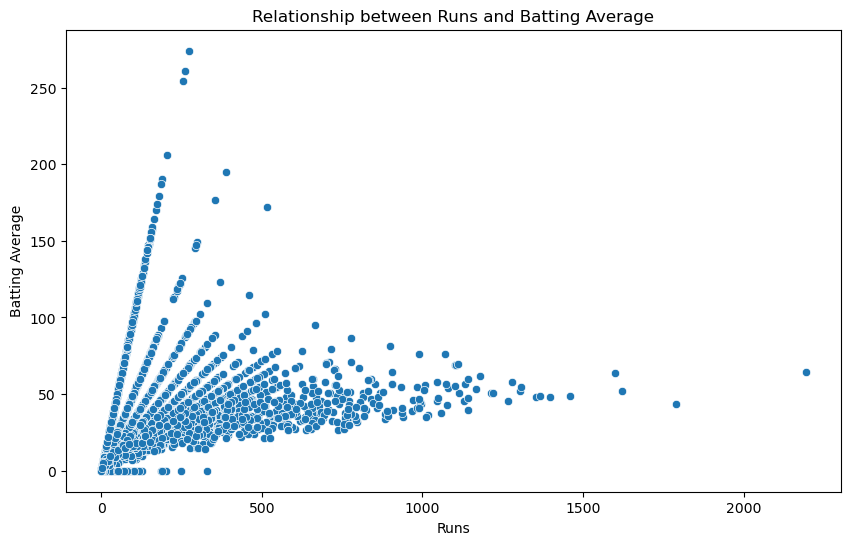

In [20]:
# Scatter plot between 'Runs' and 'Ave' (Batting Average)
# Relationship Between Variables:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Runs', y='Ave')
plt.title('Relationship between Runs and Batting Average')
plt.xlabel('Runs')
plt.ylabel('Batting Average')
plt.show()


In [ ]:
# Number of players in differnt teams who played the matches

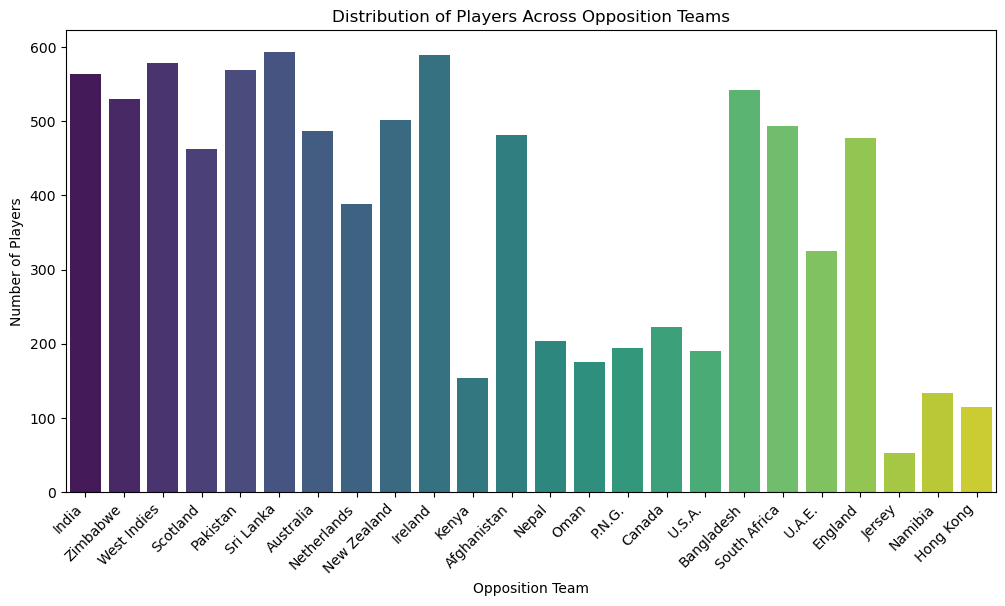

In [21]:
# Count plot for 'Opposition Team'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opposition Team', palette='viridis')
plt.title('Distribution of Players Across Opposition Teams')
plt.xlabel('Opposition Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()


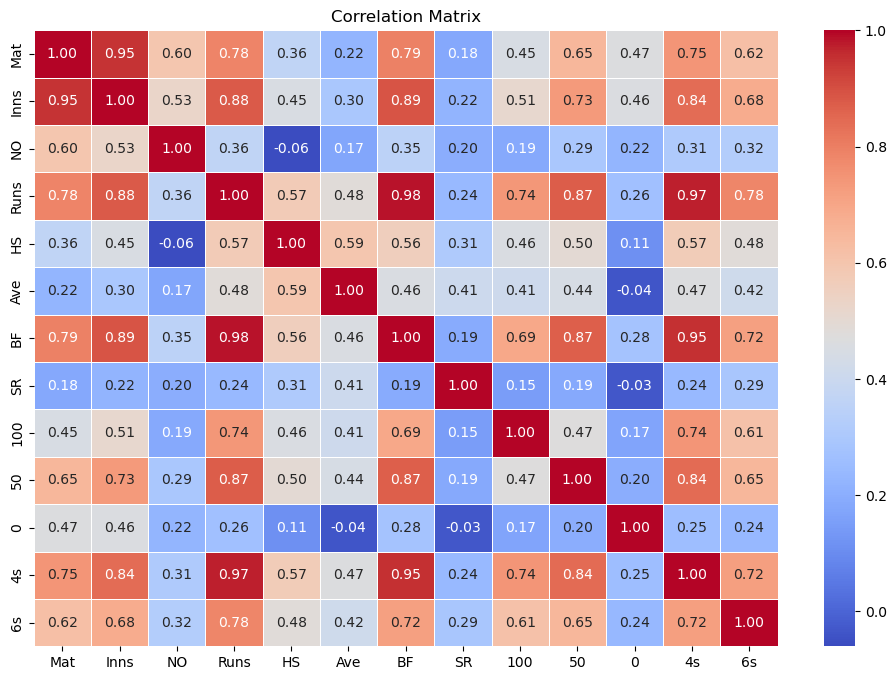

In [22]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


           Mat      Inns        NO      Runs        HS       Ave        BF  \
Mat   1.000000  0.948547  0.595091  0.784948  0.362510  0.224646  0.794010   
Inns  0.948547  1.000000  0.525819  0.876661  0.452353  0.295196  0.889593   
NO    0.595091  0.525819  1.000000  0.364083 -0.059986  0.172249  0.350270   
Runs  0.784948  0.876661  0.364083  1.000000  0.573830  0.484557  0.983722   
HS    0.362510  0.452353 -0.059986  0.573830  1.000000  0.594781  0.559710   
Ave   0.224646  0.295196  0.172249  0.484557  0.594781  1.000000  0.455147   
BF    0.794010  0.889593  0.350270  0.983722  0.559710  0.455147  1.000000   
SR    0.182468  0.220391  0.197676  0.241003  0.309004  0.407119  0.190030   
100   0.447651  0.513870  0.185052  0.742058  0.456640  0.409391  0.693618   
50    0.651056  0.734685  0.294352  0.873602  0.495009  0.441162  0.869777   
0     0.465818  0.459968  0.222781  0.264237  0.110266 -0.036504  0.276853   
4s    0.746230  0.840961  0.309989  0.973110  0.572256  0.465597

In [ ]:
# Feature Engineering
#Creating new features

In [ ]:
# 1.calculating the average runs scored by each player against each opponent team.
# 2. calculating the strike rate against specific opponent teams for each player.
### Group the data by 'Player Name' and 'Opposition Team'.
### Calculate the mean of the 'SR' (strike rate) column for each group.
### Create a new feature/column to store these strike rates.
# 3.Performance Consistency Against Opponent.
  ### we'll calculate the standard deviation of runs scored (batting) or wickets taken (bowling) across multiple matches against the same opponent.
    ###This will give us an indication of how consistent a player's performance has been against a particular opponent.

In [24]:

# Step 1: Average Runs Against Specific Opponent
average_runs = df.groupby(['Player Name', 'Opposition Team'])['Runs'].mean().reset_index()
average_runs = average_runs.rename(columns={'Runs': 'Average Runs'})
df = pd.merge(df, average_runs, on=['Player Name', 'Opposition Team'], how='left')

# Step 2: Average Strike Rate Against Specific Opponent
average_sr = df.groupby(['Player Name', 'Opposition Team'])['SR'].mean().reset_index()
average_sr = average_sr.rename(columns={'SR': 'Average SR'})
df = pd.merge(df, average_sr, on=['Player Name', 'Opposition Team'], how='left')

# Step 3: Performance Consistency Against Opponent
performance_consistency = df.groupby(['Player Name', 'Opposition Team'])['Runs'].std().reset_index()
performance_consistency = performance_consistency.rename(columns={'Runs': 'Performance Consistency'})
performance_consistency.fillna(0, inplace=True)  # Fill missing values with zero
df = pd.merge(df, performance_consistency, on=['Player Name', 'Opposition Team'], how='left')

# Step 4: Head-to-Head Performance Comparison (assuming we have data for both players)
# Calculate the difference in averages and strike rates between players facing the same opponent team
df['Average Runs Diff'] = df.groupby(['Opposition Team'])['Average Runs'].diff()
df['Average SR Diff'] = df.groupby(['Opposition Team'])['Average SR'].diff()

# Fill missing values in the differences columns with zeros
df['Average Runs Diff'].fillna(0, inplace=True)
df['Average SR Diff'].fillna(0, inplace=True)

# Display the updated DataFrame
print(df.head())


  Player Name  Mat  Inns  NO  Runs    HS   Ave  BF      SR  100  50  0  4s  \
0  A Athanaze    3     3   0    60  32.0  20.0  77   77.92    0   0  0   6   
1  A Athanaze    1     1   0     0   0.0   0.0   1    0.00    0   0  1   0   
2  A Athanaze    1     1   0     4   4.0   4.0   2  200.00    0   0  0   1   
3     A Bagai    1     1   0    10  10.0  10.0  24   41.66    0   0  0   0   
4     A Bagai    1     1   0    16  16.0  16.0  35   45.71    0   0  0   2   

   6s Opposition Team  Average Runs  Average SR  Performance Consistency  \
0   1           India          60.0       77.92                      0.0   
1   0        Zimbabwe           0.0        0.00                      0.0   
2   0     West Indies           4.0      200.00                      0.0   
3   0        Scotland          10.0       41.66                      0.0   
4   0        Pakistan          16.0       45.71                      0.0   

   Average Runs Diff  Average SR Diff  
0                0.0              

In [25]:
df1=df
df2=df

In [ ]:
#Encode categorical variables and scale numerical features.
###Encoding categorical variables is necessary to convert them into a numerical format that machine learning algorithms can understand. Scaling numerical features ensures that all features are on the same scale,
### preventing features with larger values from dominating the model.

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numerical columns
categorical_cols = ['Player Name', 'Opposition Team']
numerical_cols = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Performance Consistency']

# Create transformers for encoding categorical variables and scaling numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])



In [27]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(df1)


In [28]:
# Define the threshold for the target variable
threshold = 50

# Create the binary target variable
df1['Above_Threshold'] = df1['Runs'].apply(lambda x: 1 if x >= threshold else 0)

# Check the distribution of the target variable
print(df1['Above_Threshold'].value_counts())


Above_Threshold
0    5724
1    3299
Name: count, dtype: int64


In [ ]:
#train_test_split

In [41]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = transformed_data
y = df1['Above_Threshold']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6316, 1431) (6316,)
Testing set shape: (2707, 1431) (2707,)


In [42]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.9867011451791651
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1739
           1       0.99      0.98      0.98       968

    accuracy                           0.99      2707
   macro avg       0.99      0.98      0.99      2707
weighted avg       0.99      0.99      0.99      2707

Confusion Matrix:
[[1726   13]
 [  23  945]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



In [47]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1739
           1       0.99      0.90      0.94       968

    accuracy                           0.96      2707
   macro avg       0.97      0.95      0.96      2707
weighted avg       0.96      0.96      0.96      2707

Confusion Matrix:
[[1729   10]
 [  95  873]]


In [ ]:
# cross-validation.

In [51]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    "Logistic Regression": logreg_model,
    "Random Forest Classifier": rf_classifier,
    "Gradient Boosting Classifier": gb_classifier,
    "XGBoost Classifier": xgb_classifier,
    "K-Nearest Neighbors (KNN) Classifier": knn
}

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print("Cross-Validation Accuracy Scores:", scores)
    print("Average Accuracy:", scores.mean())
    print()


Logistic Regression:
Cross-Validation Accuracy Scores: [0.98971519 0.98653998 0.97783056 0.98337292 0.98653998]
Average Accuracy: 0.9847997283943194

Random Forest Classifier:
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0

Gradient Boosting Classifier:
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0

XGBoost Classifier:
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0

K-Nearest Neighbors (KNN) Classifier:
Cross-Validation Accuracy Scores: [0.95490506 0.94457641 0.94378464 0.96120348 0.94061758]
Average Accuracy: 0.949017433877547



In [ ]:
# evaluate the models on the testing data and plot the confusion matrices:

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1739
           1       0.99      0.98      0.98       968

    accuracy                           0.99      2707
   macro avg       0.99      0.98      0.99      2707
weighted avg       0.99      0.99      0.99      2707



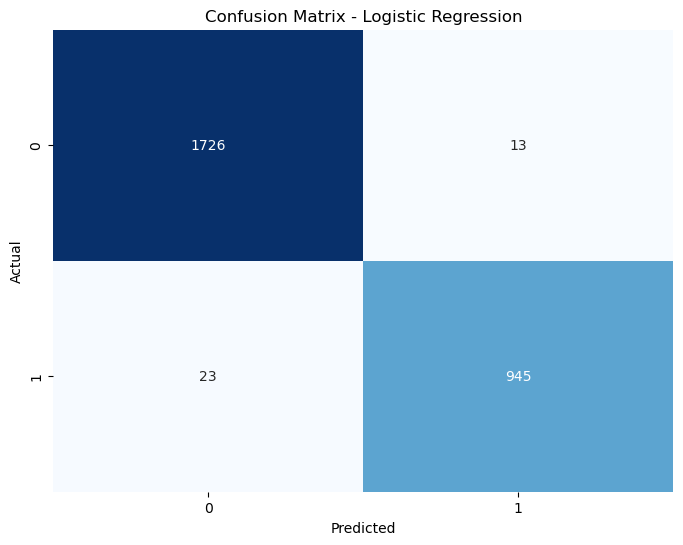

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



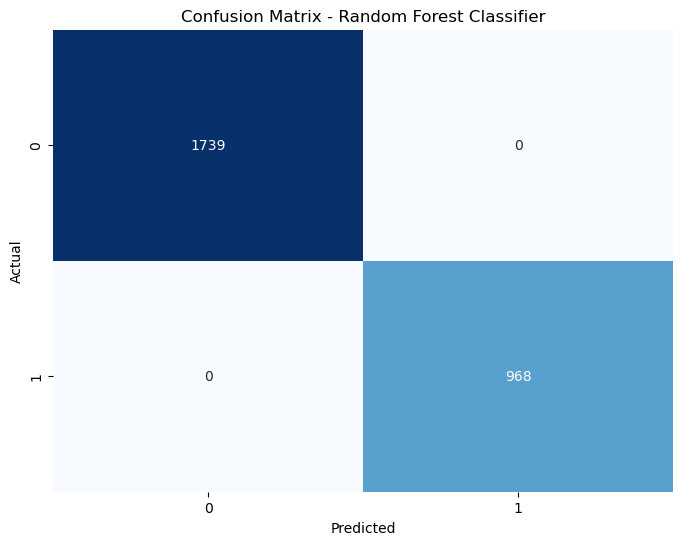

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



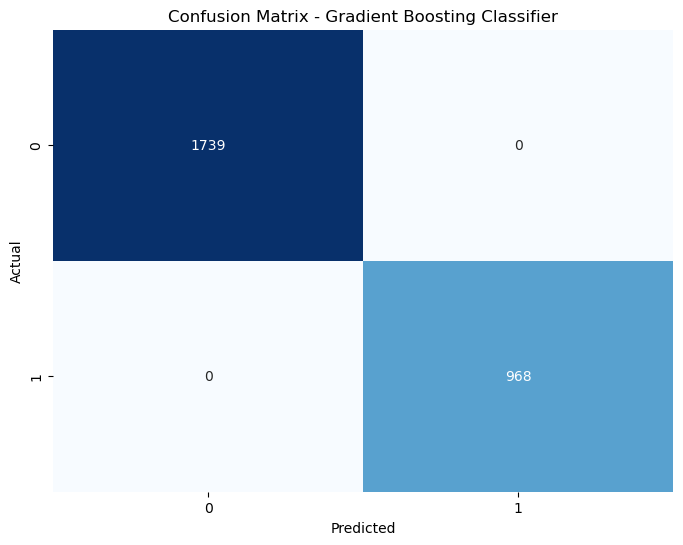

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00       968

    accuracy                           1.00      2707
   macro avg       1.00      1.00      1.00      2707
weighted avg       1.00      1.00      1.00      2707



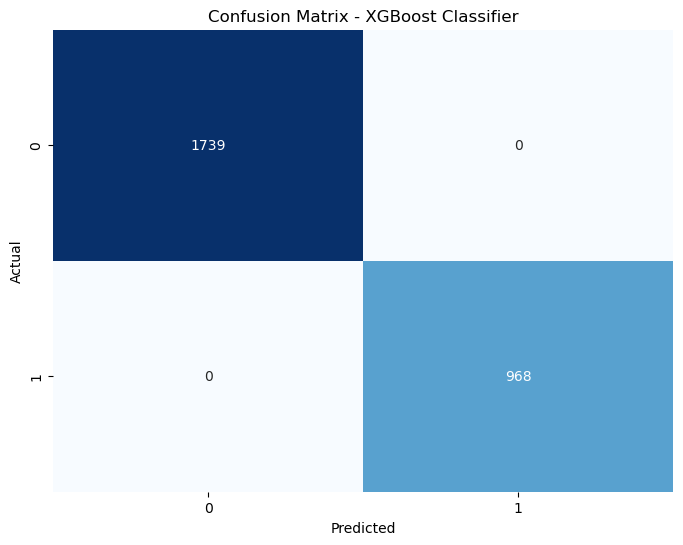

Classification Report for K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1739
           1       0.99      0.90      0.94       968

    accuracy                           0.96      2707
   macro avg       0.97      0.95      0.96      2707
weighted avg       0.96      0.96      0.96      2707



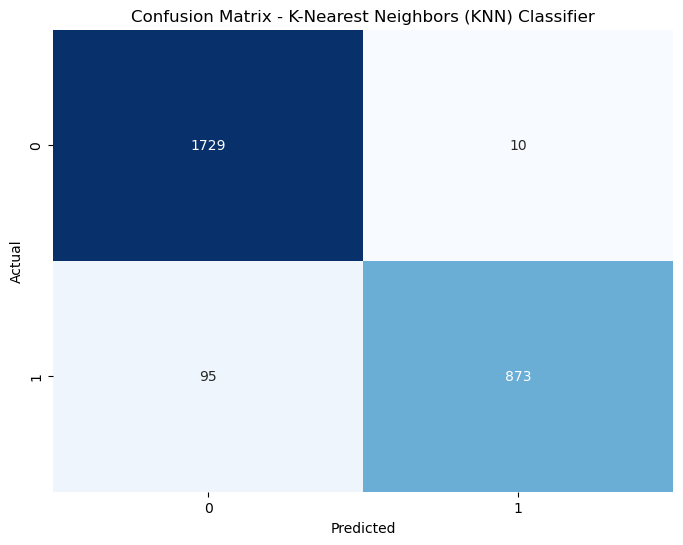

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate and plot the confusion matrix for a given model
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate and plot confusion matrices for each model
models = {
    "Logistic Regression": logreg_model,
    "Random Forest Classifier": rf_classifier,
    "Gradient Boosting Classifier": gb_classifier,
    "XGBoost Classifier": xgb_classifier,
    "K-Nearest Neighbors (KNN) Classifier": knn
}

for model_name, model in models.items():
    evaluate_model(model, X_test, y_test, model_name)


In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prana\anaconda3\Lib\site-package

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with the best parameters
best_rf = RandomForestClassifier(n_estimators=100,
                                 min_samples_split=10,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 max_depth=None,
                                 random_state=42)

# Train the model with the training data
best_rf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [58]:
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier with best parameters
best_rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=None)

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

# Calculate average accuracy
average_accuracy = cv_scores.mean()

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", average_accuracy)


Cross-Validation Accuracy Scores: [1.         1.         1.         0.99920823 1.        ]
Average Accuracy: 0.9998416468725256


In [62]:
# Fit the RandomForestClassifier with the training data
best_rf_model.fit(X_train, y_train)

# Extract feature importances from the trained RandomForestClassifier
feature_importances = best_rf_model.feature_importances_

# Get the names of the features
feature_names = numerical_cols + categorical_cols

# Check if the lengths match
if len(feature_names) != len(feature_importances):
    # If they don't match, print the lengths for debugging
    print("Length of feature names:", len(feature_names))
    print("Length of feature importances:", len(feature_importances))
    # If there are missing feature importances, handle them here
    # For example, you can replace missing importances with zeros
    # Or you can remove features without importances from the feature names list
    # Ensure that both lists have the same length after handling missing values
else:
    # Lengths match, proceed with plotting feature importances
    # Create a DataFrame to store feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()


Length of feature names: 16
Length of feature importances: 1431


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with best parameters
rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=None)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Calculate average accuracy
average_accuracy = cv_scores.mean()

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", average_accuracy)


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0


# Final algorithm for implement

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1739
           1       0.99      0.90      0.94       968

    accuracy                           0.96      2707
   macro avg       0.97      0.95      0.96      2707
weighted avg       0.96      0.96      0.96      2707

Confusion Matrix:
[[1729   10]
 [  95  873]]


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the KNN classifier with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data using the fine-tuned KNN model
y_pred_test = best_knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Calculate precision
precision = precision_score(y_test, y_pred_test)

# Calculate recall
recall = recall_score(y_test, y_pred_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Evaluation Metrics for Fine-tuned KNN Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Evaluation Metrics for Fine-tuned KNN Classifier:
Accuracy: 0.9723
Precision: 0.9956
Recall: 0.9267
F1-score: 0.9599


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)


Accuracy: 0.9612116734392316
Precision: 0.9886749716874292
Recall: 0.9018595041322314
F1-score: 0.9432739059967584
Confusion Matrix:
 [[1729   10]
 [  95  873]]


In [82]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': 100}


In [84]:
# Get feature names from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out().tolist() + numerical_cols

# Print feature importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(feature_name, ":", importance)


Player Name_A Athanaze : 6.880304218416974e-09
Player Name_A Athanaze  : 0.0
Player Name_A Bagai : 5.626337345912062e-05
Player Name_A Balbirnie : 0.00010383227687944314
Player Name_A Bohara : 0.0
Player Name_A Dananjaya : 8.245521842986825e-05
Player Name_A Dutt : 9.240781442458857e-06
Player Name_A Johnson : 1.5818785101414856e-08
Player Name_A Martin : 6.532026103740951e-08
Player Name_A Mishra : 0.0
Player Name_A Mithun : 0.0
Player Name_A Nao : 4.6914916381110105e-05
Player Name_A Ndlovu : 0.0
Player Name_A Nehra : 5.056704495437166e-08
Player Name_A Neill : 9.885009364738937e-07
Player Name_A Nortje : 9.021387621753706e-08
Player Name_A Phillip : 0.0
Player Name_A Saud : 7.424514126645585e-05
Player Name_A Shahzad : 2.5116754158786173e-05
Player Name_A Sharafu : 9.652000612584776e-07
Player Name_A Sharma : 1.5205866369570492e-05
Player Name_A Vala : 0.00011875305636540909
Player Name_A Zampa : 4.540353549856636e-05
Player Name_A van der Merwe : 2.737330487858881e-08
Player Name_A

In [85]:

# Create sample data for X_new
data = {
    'Player Name': ['Player A', 'Player B'],
    'Opposition Team': ['Team X', 'Team Y'],
    'Mat': [10, 8],
    'Inns': [10, 8],
    'NO': [2, 1],
    'Runs': [350, 280],
    'HS': [80, 75],
    'Ave': [50.0, 40.0],
    'BF': [500, 450],
    'SR': [70.0, 60.0],
    '100': [0, 0],
    '50': [3, 2],
    '0': [2, 3],
    '4s': [40, 30],
    '6s': [10, 5],
    'Performance Consistency': [85, 75]
}

# Create a DataFrame for X_new
X_new = pd.DataFrame(data)

# Transform X_new using the preprocessor pipeline
X_new_transformed = pipeline.transform(X_new)

# Now you can use the trained model to make predictions on X_new_transformed
new_predictions = model.predict(X_new_transformed)
print("Predictions on new data:", new_predictions)


Predictions on new data: [1 1]


In [86]:
import pickle

# Save the trained KNN model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select the 2 features you want to use
selected_features = ['Player Name', 'Opposition Team']

# Modify your data to include only those 2 features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data with the selected features
knn_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data with the selected features
y_pred_knn = knn_classifier.predict(X_test_selected)

# Evaluate the performance of the classifier
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U15'), dtype('<U15')) -> None

In [ ]:
## wotrking with another mofel

In [88]:
from sklearn.preprocessing import StandardScaler

# select only the numeric columns
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [92]:
from sklearn.preprocessing import OneHotEncoder

# create a OneHotEncoder object
encoder = OneHotEncoder()

# fit and transform the categorical columns
df2[['Player Name', 'Opposition Team']] = encoder.fit_transform(df2[['Player Name', 'Opposition Team']]).toarray()

ValueError: Columns must be same length as key

In [93]:
from sklearn.preprocessing import OneHotEncoder

# create a OneHotEncoder object
encoder = OneHotEncoder()

# fit and transform the categorical columns
df2[['Player Name', 'Opposition Team']] = encoder.fit_transform(df2[['Player Name', 'Opposition Team']]).toarray()

ValueError: Columns must be same length as key